In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from google.colab import files

In [ ]:
uploaded = files.upload()
filename = list(uploaded.keys())[0]
data = pd.read_csv(filename)

print("Dataset shape:", data.shape)
print("\nFirst rows of data:")
print(data.head())

Saving USA Housing Dataset.csv to USA Housing Dataset (2).csv
Dataset shape: (4140, 18)

First rows of data:
                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-09 00:00:00   376000.0       3.0       2.00         1340      1384   
1  2014-05-09 00:00:00   800000.0       4.0       3.25         3540    159430   
2  2014-05-09 00:00:00  2238888.0       5.0       6.50         7270    130017   
3  2014-05-09 00:00:00   324000.0       3.0       2.25          998       904   
4  2014-05-10 00:00:00   549900.0       5.0       2.75         3060      7015   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     3.0           0     0          3        1340              0      2008   
1     2.0           0     0          3        3540              0      2007   
2     2.0           0     0          3        6420            850      2010   
3     2.0           0     0          3         798            200      2007   
4     1.0

In [ ]:
data.columns = data.columns.str.lower()
data.drop(['date', 'street'], axis=1, inplace=True, errors='ignore')

numeric_cols = data.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    data[col].fillna(data[col].mean(), inplace=True)

/tmp/ipython-input-2393682813.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)


In [ ]:
data.drop(['date', 'street'], axis=1, inplace=True, errors='ignore')
numeric_cols = data.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    data[col] = data[col].fillna(data[col].mean())

X = data.drop('price', axis=1)
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("\nModel Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Model Evaluation:
Mean Absolute Error (MAE): 121716.89
Root Mean Squared Error (RMSE): 221862.02


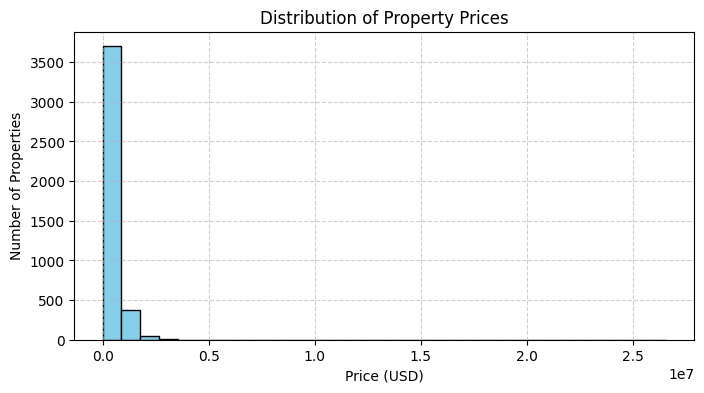

In [ ]:
plt.figure(figsize=(8,4))
plt.hist(y, bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Property Prices")
plt.xlabel("Price (USD)")
plt.ylabel("Number of Properties")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [ ]:
if 'Sqft Living' in data.columns:
    plt.figure(figsize=(6,4))
    plt.scatter(data['Sqft Living'], data['Price'], alpha=0.5, color='teal')
    plt.title("Sqft Living vs Price")
    plt.xlabel("Living Area (Sqft)")
    plt.ylabel("Price (USD)")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

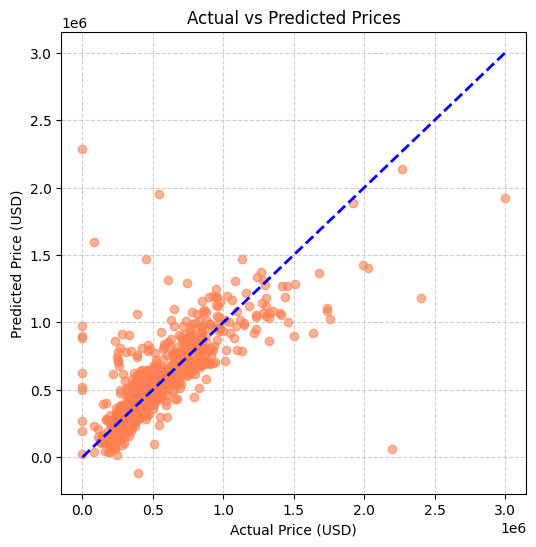

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, color='coral', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'b--', lw=2)
plt.title("Actual vs Predicted Prices")
plt.xlabel("Actual Price (USD)")
plt.ylabel("Predicted Price (USD)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

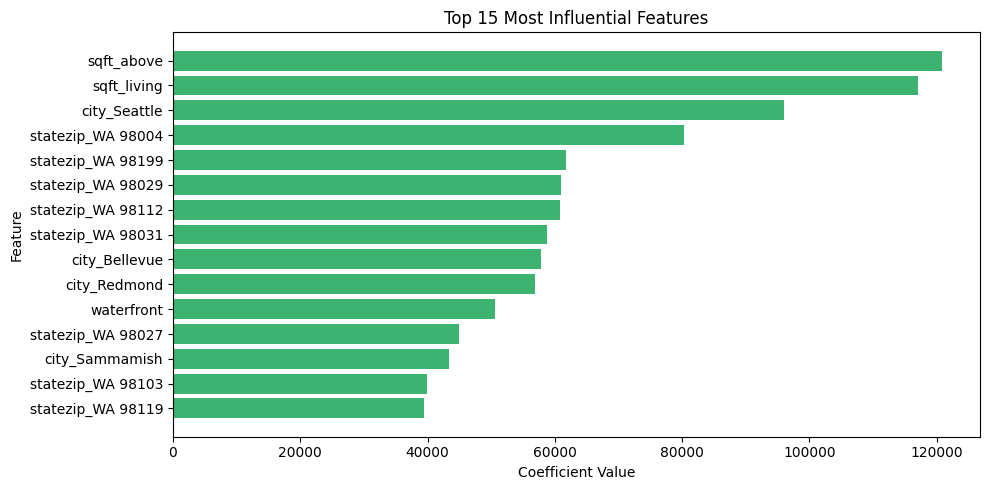

In [ ]:
plt.figure(figsize=(10,5))
coef_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model.coef_})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
plt.barh(coef_df['Feature'][:15], coef_df['Coefficient'][:15], color='mediumseagreen')
plt.title("Top 15 Most Influential Features")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
print("\nExample Predictions:")
print(pd.DataFrame({
    'Actual Price': y_test.values[:5],
    'Predicted Price': y_pred[:5]
}))


Example Predictions:
   Actual Price  Predicted Price
0      600000.0    758241.624863
1      370000.0    555872.097066
2      471000.0    434057.743745
3      240000.0    274584.589043
4      413000.0    294889.193738
